In [9]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import os

# Load the data
data=pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
data.shape

(20640, 10)

In [12]:
data.isnull().sum()



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [13]:
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].mean())

In [14]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
data["ocean_proximity"]=data["ocean_proximity"].astype('category')

In [18]:
data.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity       category
dtype: object

In [19]:

data = data.loc[~data.duplicated(subset=['longitude','latitude'])] # remove duplicates based on longitude and latitude
data.shape

(12590, 10)

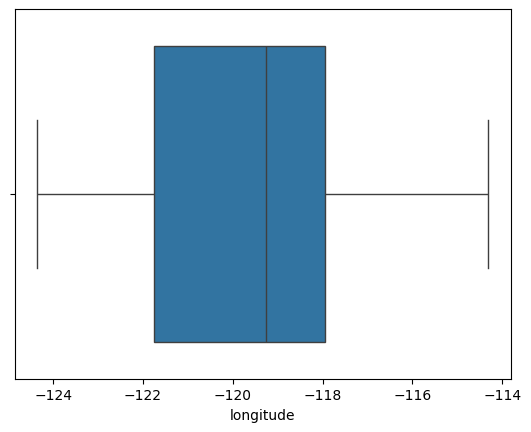

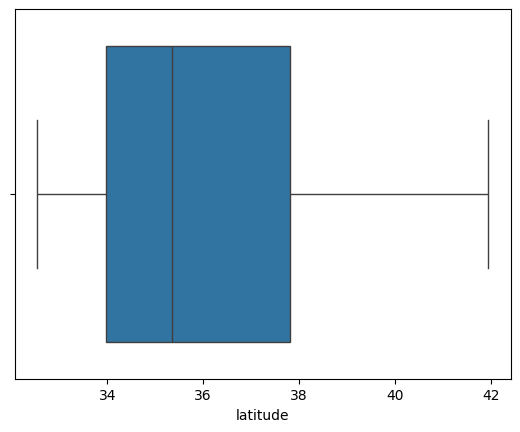

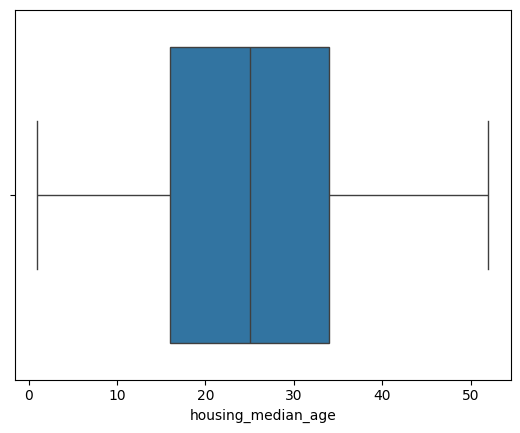

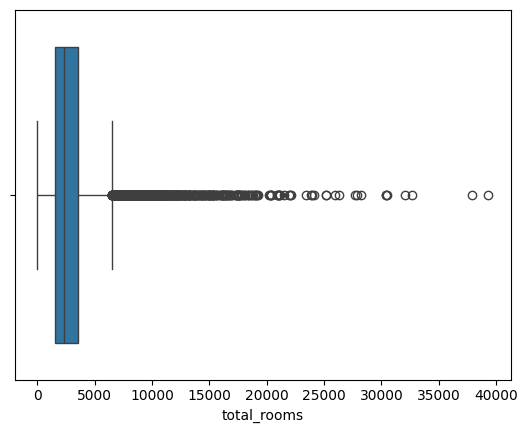

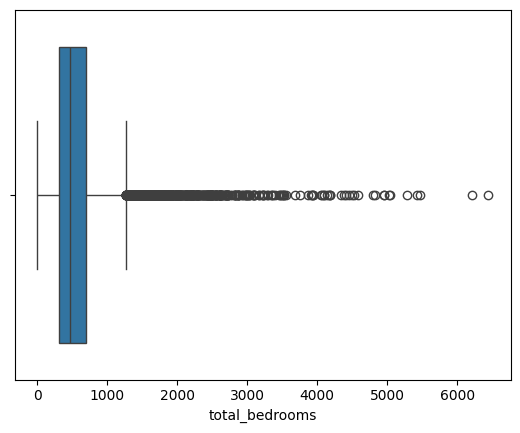

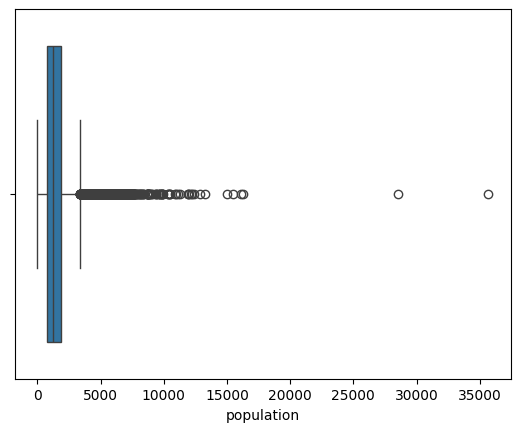

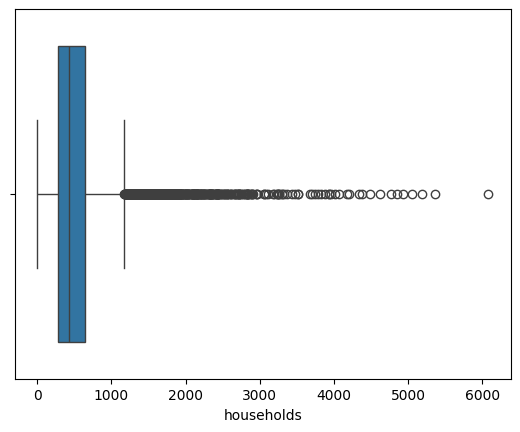

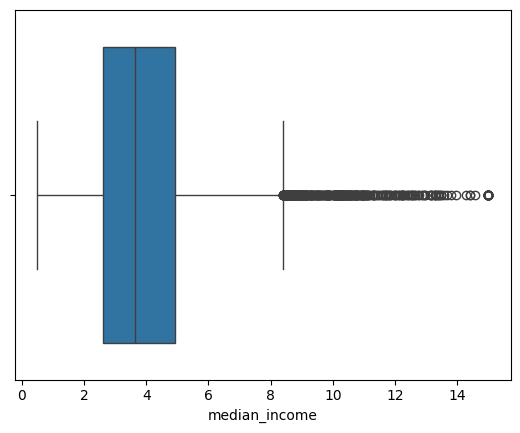

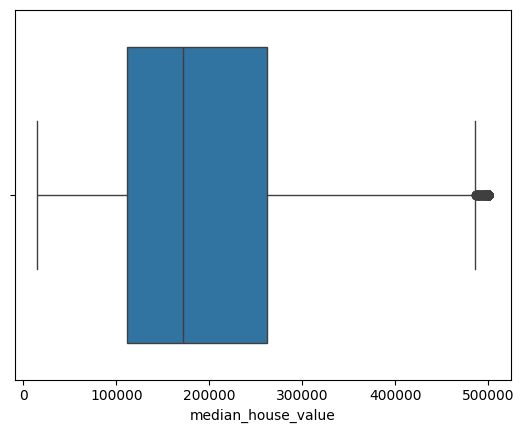

In [20]:
for i in data.select_dtypes(include='number').columns:
    sb.boxplot(data, x=i)
    plt.show()

In [21]:
data['population'].value_counts()

population
1301.0    17
850.0     17
825.0     16
753.0     16
1181.0    15
          ..
5022.0     1
2948.0     1
2771.0     1
397.0      1
6912.0     1
Name: count, Length: 3575, dtype: int64

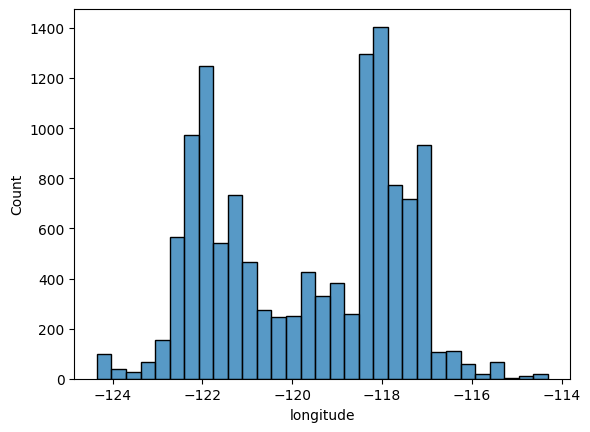

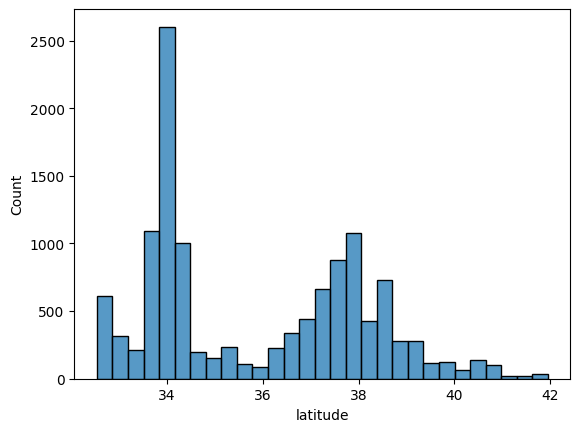

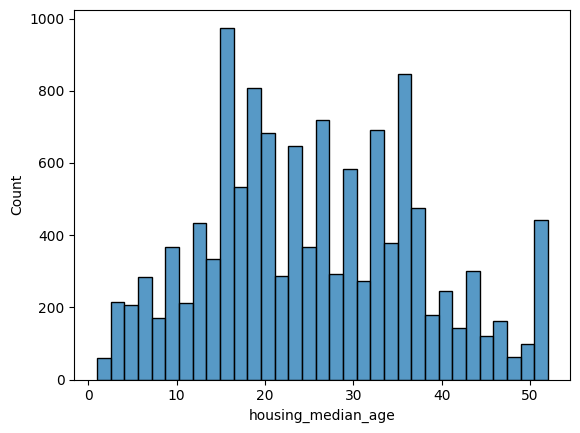

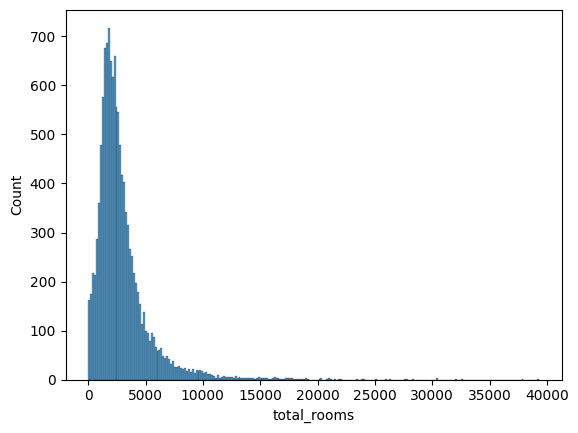

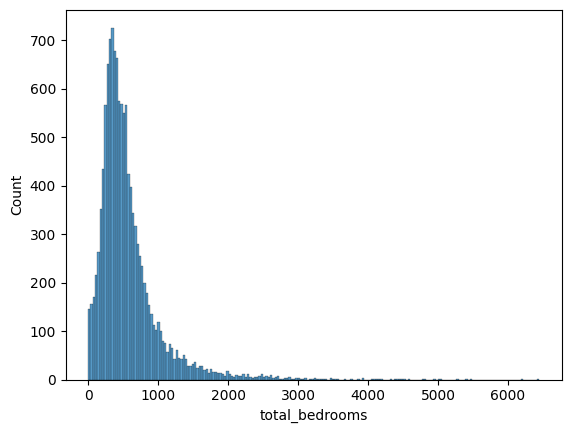

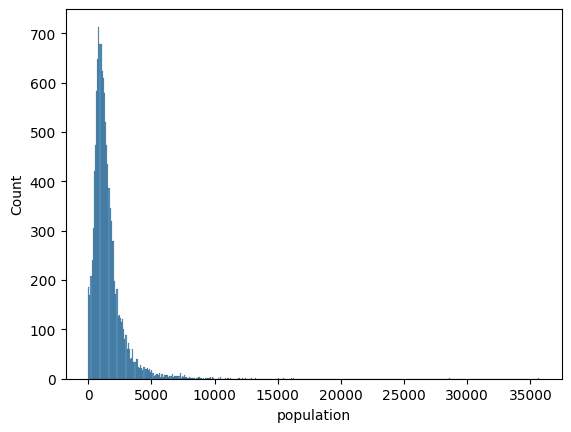

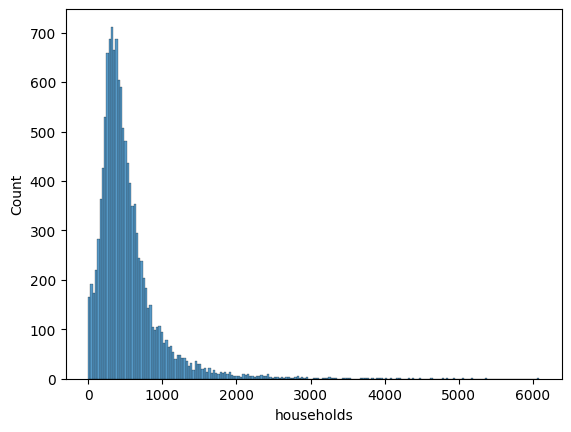

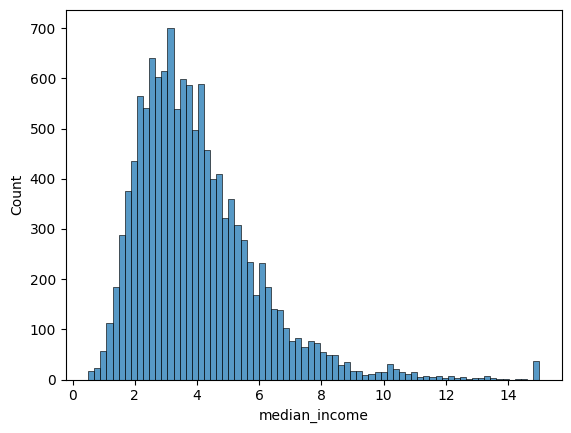

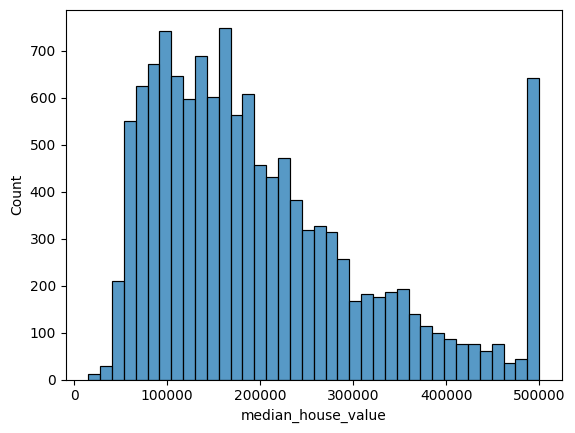

In [24]:
for i in data.select_dtypes(include='number').columns:
    sb.histplot(data=data, x=i)
    plt.show()

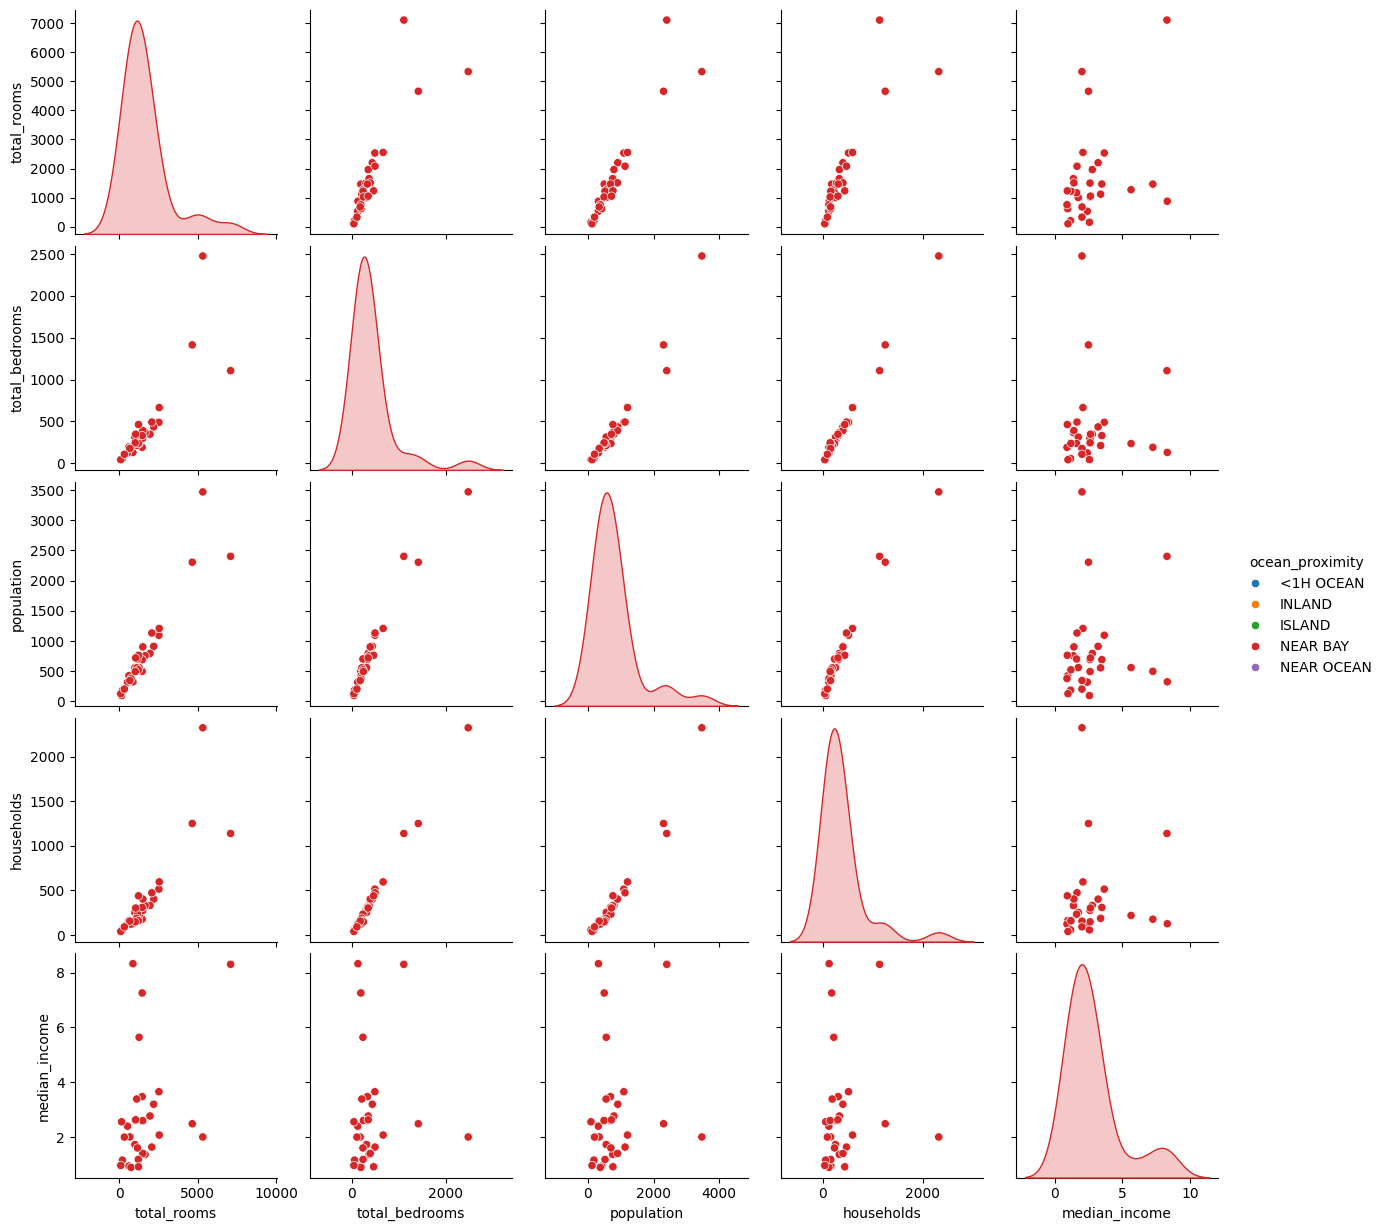

In [ ]:
sb.pairplot(data.head(30), 
            vars=['total_rooms','total_bedrooms', 'population', 'households', 'median_income'], 
            hue='ocean_proximity')
plt.show()

In [26]:
data_corr=data[['total_rooms','total_bedrooms', 'population', 'households', 'median_income']].dropna().corr()
data_corr

,total_rooms,total_bedrooms,population,households,median_income
total_rooms,1.000000,0.945274,0.877465,0.934156,0.197002
total_bedrooms,0.945274,1.000000,0.883482,0.973698,0.020022
population,0.877465,0.883482,1.000000,0.919792,0.042359
households,0.934156,0.973698,0.919792,1.000000,0.044718
median_income,0.197002,0.020022,0.042359,0.044718,1.000000


<Axes: >

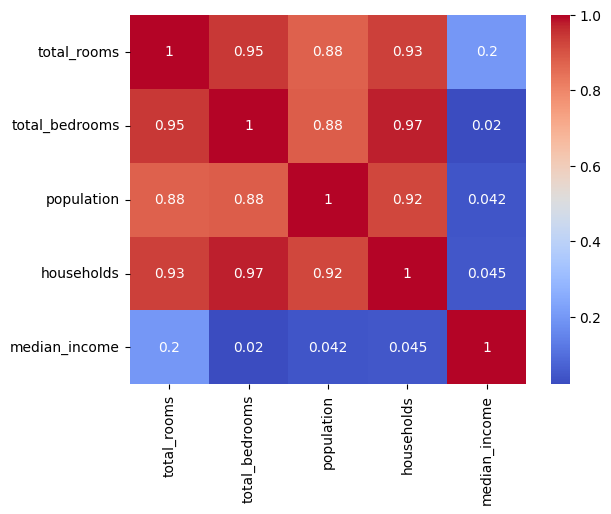

In [27]:
sb.heatmap(data_corr, annot=True, cmap="coolwarm")